##Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import skew, kurtosis
import missingno as msno
from scipy import stats
from scipy.stats import zscore
from sklearn.ensemble import RandomForestRegressor

##Reading the data

In [ ]:
path = '/content/data_test.csv'
df = pd.read_csv(path)
df

,hh_id,year,month,zipcode,mozip,lusage,luse1,luse2,luse3,luse4,...,income2,income3,income4,income5,income6,income7,income8,income9,owner,size
0,3,2010,4,53.0,540.0,6.322805,6.505642,6.388161,6.207919,6.439571,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
1,3,2010,5,53.0,541.0,6.510683,6.505642,6.388161,6.207919,6.439571,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
2,3,2010,6,53.0,542.0,6.696693,6.505642,6.388161,6.207919,6.439571,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
3,3,2010,7,53.0,543.0,6.967286,6.505642,6.388161,6.207919,6.439571,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
4,3,2010,8,53.0,544.0,6.966908,6.505642,6.388161,6.207919,6.439571,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318235,47356,2011,4,50.0,515.0,6.791299,6.696123,6.721847,6.800592,6.955112,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,12490.0
318236,47356,2011,5,50.0,516.0,6.949129,6.696123,6.721847,6.800592,6.955112,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,12490.0
318237,47356,2011,6,50.0,517.0,7.010714,6.696123,6.721847,6.800592,6.955112,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,12490.0
318238,47356,2011,7,50.0,518.0,7.193545,6.696123,6.721847,6.800592,6.955112,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,12490.0


In [ ]:
df.iloc[:,:13]

,hh_id,year,month,zipcode,mozip,lusage,luse1,luse2,luse3,luse4,luse5,luse6,children
0,3,2010,4,53.0,540.0,6.322805,6.505642,6.388161,6.207919,6.439571,6.651676,6.481242,1.0
1,3,2010,5,53.0,541.0,6.510683,6.505642,6.388161,6.207919,6.439571,6.651676,6.481242,1.0
2,3,2010,6,53.0,542.0,6.696693,6.505642,6.388161,6.207919,6.439571,6.651676,6.481242,1.0
3,3,2010,7,53.0,543.0,6.967286,6.505642,6.388161,6.207919,6.439571,6.651676,6.481242,1.0
4,3,2010,8,53.0,544.0,6.966908,6.505642,6.388161,6.207919,6.439571,6.651676,6.481242,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318235,47356,2011,4,50.0,515.0,6.791299,6.696123,6.721847,6.800592,6.955112,7.011101,6.785274,0.0
318236,47356,2011,5,50.0,516.0,6.949129,6.696123,6.721847,6.800592,6.955112,7.011101,6.785274,0.0
318237,47356,2011,6,50.0,517.0,7.010714,6.696123,6.721847,6.800592,6.955112,7.011101,6.785274,0.0
318238,47356,2011,7,50.0,518.0,7.193545,6.696123,6.721847,6.800592,6.955112,7.011101,6.785274,0.0


In [ ]:
df.iloc[:,13:]

,hhsize2,hhsize3,hhsize4,hhsize5,hhsize5plus,income2,income3,income4,income5,income6,income7,income8,income9,owner,size
0,0,0,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
1,0,0,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
2,0,0,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
3,0,0,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
4,0,0,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318235,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,12490.0
318236,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,12490.0
318237,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,12490.0
318238,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,12490.0


#Purpose, Aim and First Thoughts
The dataset holds data on household electricity consumption.

In my opinion, data hides answers and holds massive information. This is why it's a data analyst's job to show what information the data holds and to bring  the answers to the surface.

The person or company that will have this kind of data and would be useful to them would usually be a electricity provider company or a government. I will try to answer as many questions as possible from the data, thinking what I would want to know if I was a electricity provider or a government or just a normal person. I also think generally it's good if the data analyst also knows information from the domain that the data is coming from.

Before being able to retrieve information from the dataset we need to see some statistics and solve the missing data problem without creating biases.

#Data Overview and Understanding the Data

#Corelations


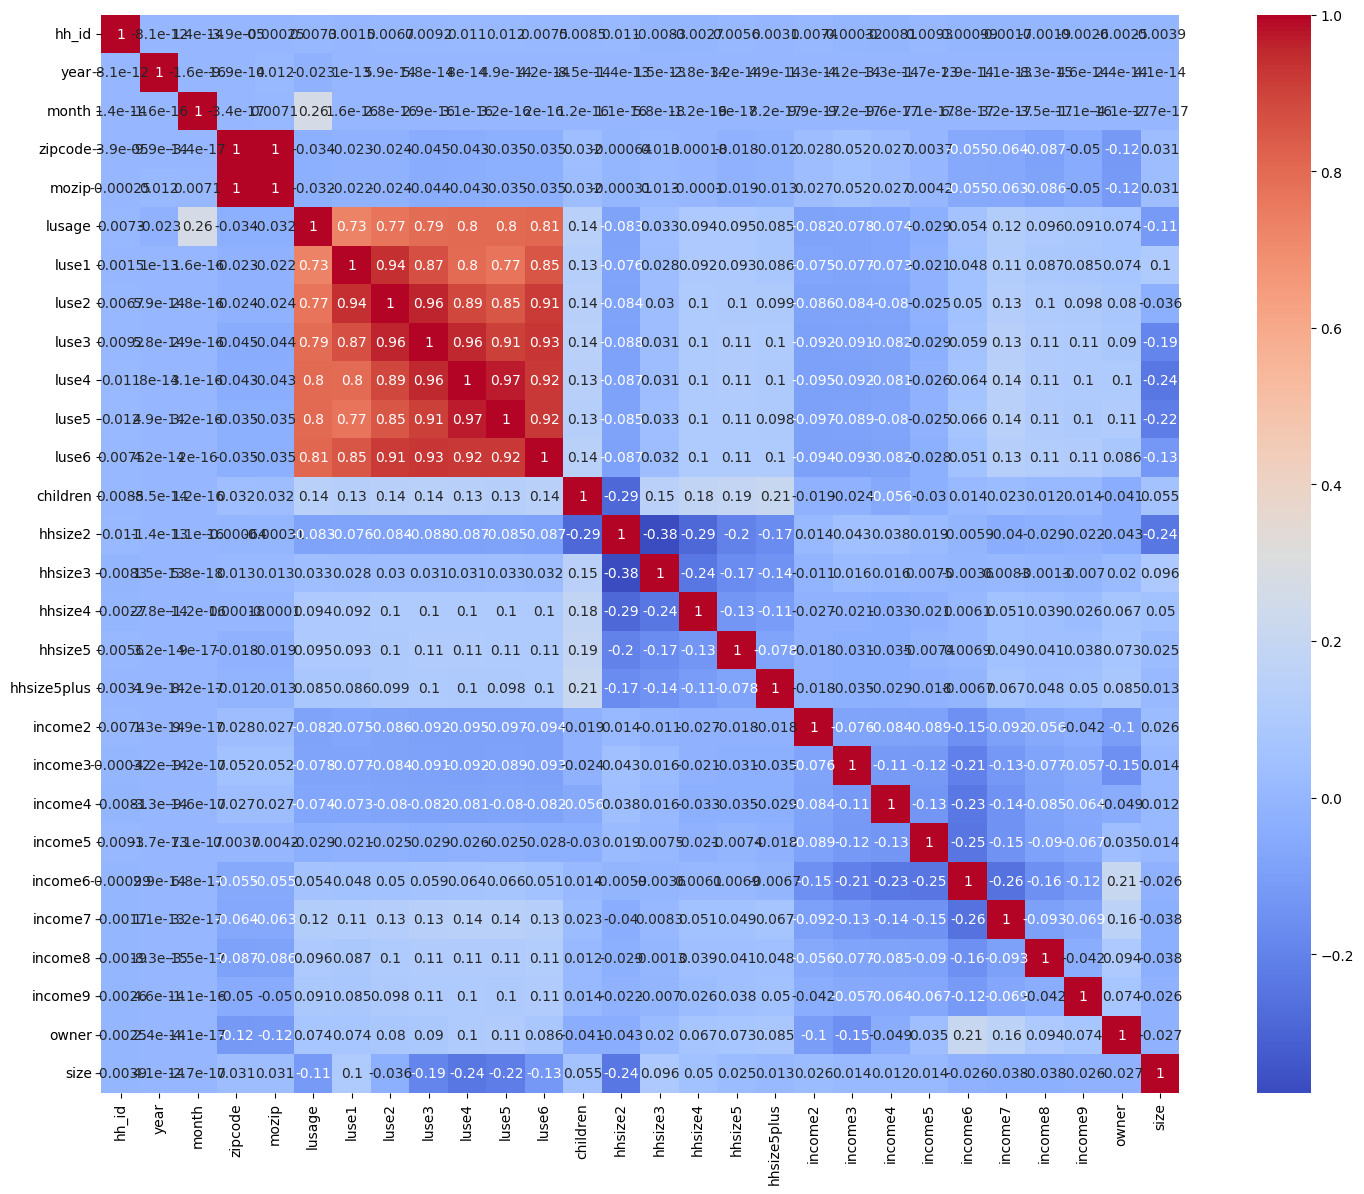

In [ ]:
plt.figure(figsize=(20, 14))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", square=True)
plt.show()

##**Interpretation**

What I can see is that there are two clusters of strong corellations.

**Zipcode and mozip**

---


First one is between zipcode and mozip, it makes sense they have a strong correlation since mozip is based on zipcode.

**Lusage and luse1-6**

---


The other one is between lusage and luse1-6, those correlations that range from 0.7 to 0.97 are very strong. We can get from that the fact that if a house used more energy in 2009, we can expect in general that they would use more energy in 2010 as well. This means that past consumption is a strong predictor of future consumption.

**Size and lusage**


---


Intriguing to me is the following, the correlation between size and lusage is -0.11, a weak negative correlation. That means that if size or lusage goes up, the other one goes down. I would normally expect a house if it's bigger to have a bigger usage than on that's smaller, but this could not be the case since a bigger house could be better insulated or designed so it doesn't lose that much heat or uses less heat, or they heat their homes not with electricity.

**Children and lusage**

---


A correlation that makes sense is between children and lusage, if the house has children the usage goes up. Another one is between owner and lusage, if the owner owns the house the usage goes up.

**Income and lusage**

---


I want to take a closer look at the corellations between incomes2-9 and lusage. We can see that corellations of incomes2 to 4 with lusage are negative (-0.082, -0.079 and -0.074). So if the income in those income brackets goes up that means that energy consumption goes down and the other way around, this could be due to the fact that someone with less income might be forced to adopt heating systems that are cheaper to install but are not that efficient. Whereas the correlations between income 5 to 9 with lusage are positive (ranging from 0.02 to 0.12), this means that as the income goes up so does consumption. This again could be due to several reasons, like having more disposable income, or having children etc.

**Hhsize and lusage**

---


Hhsize2-5+ and lusage are also interesting to look at. We would assume that if a house has more inhabitants then there would be more electricity usage, but our data also shows something different. The only negative one being hhsize2 and lusage, there could be reasons of why that's the case like energy saving behaviour. The other correlations are all positive, this is as I would assume, because more people means more things that use energy are used.


##**What are the factors that influence consumption the most?**

Text(0.5, 1.0, 'Lusage vs Size')

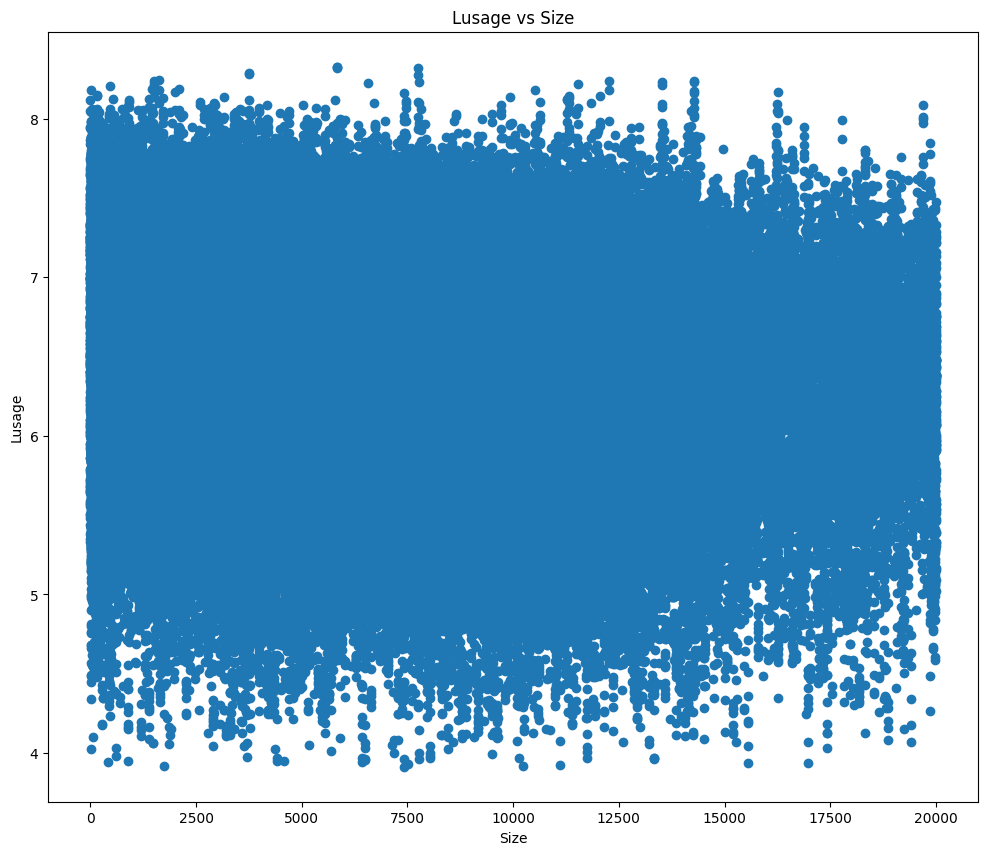

In [ ]:
plt.figure(figsize=(12, 10))
plt.scatter(x=df[['size']], y=df['lusage'])
plt.xlabel('Size')
plt.ylabel('Lusage')
plt.title('Lusage vs Size')

In [ ]:
dfnona = df.dropna()
y = dfnona['lusage']
X = dfnona.drop(columns=['lusage'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"""I decided to drop the nulls for this case. Since I didn't want to input data which might affect the result.
MSE is: {mse:.2f} which means that the model's prediction is pretty accurate,
R2: {r2:.2f} is again a strong prediction for the dependent variable.""")

I decided to drop the nulls for this case. Since I didn't want to input data which might affect the result.
MSE is: 0.09 which means that the model's prediction is pretty accurate,
R2: 0.76 is again a strong prediction for the dependent variable.


In [ ]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
coefficients = coefficients.sort_values(by="Coefficient", ascending=False)
coefficients["Coefficient"] = coefficients["Coefficient"].round(2)
print(coefficients)

        Feature  Coefficient
9         luse5         0.31
10        luse6         0.29
5         luse1         0.16
8         luse4         0.13
2         month         0.12
7         luse3         0.03
11     children         0.03
24      income9         0.03
22      income7         0.02
23      income8         0.02
16  hhsize5plus         0.01
15      hhsize5         0.01
14      hhsize4         0.01
21      income6         0.01
13      hhsize3         0.01
3       zipcode         0.00
12      hhsize2         0.00
26         size         0.00
0         hh_id        -0.00
4         mozip        -0.00
17      income2        -0.00
18      income3        -0.01
20      income5        -0.01
6         luse2        -0.01
19      income4        -0.01
25        owner        -0.02
1          year        -0.02


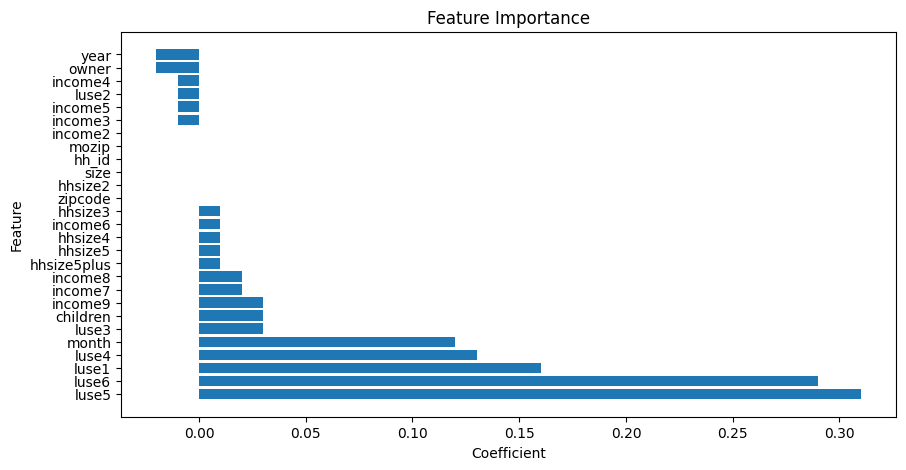

In [ ]:
plt.figure(figsize=(10, 5))
plt.barh(coefficients["Feature"], coefficients["Coefficient"])
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

The features that have the biggest impact on consumtion are luse1/4/5/6 and month. From this we understand that past usage reflects into future usage and also the month, which is normal since colder months require more heating thus higher energy usage.

#Ranges

##Statistics (Mean, STD, Quartiles)
I splitted into two parts just so it is easier to see the information for all of the columns.

In [ ]:
df.iloc[:,:13].describe()

,hh_id,year,month,zipcode,mozip,lusage,luse1,luse2,luse3,luse4,luse5,luse6,children
count,318240.000000,318240.000000,318240.000000,316090.000000,316090.000000,318240.000000,302820.000000,308410.000000,309330.000000,309300.000000,309300.000000,309430.000000,316090.000000
mean,23681.297480,2010.500000,6.000000,38.459331,396.765019,6.378592,6.120997,6.121774,6.175623,6.383423,6.512235,6.208394,0.303616
std,13668.726916,0.500001,1.414216,19.374454,200.030749,0.631193,0.587306,0.580189,0.602595,0.617254,0.611170,0.571275,0.459820
min,3.000000,2010.000000,4.000000,1.000000,6.000000,3.913470,-0.200671,0.054521,-0.133531,1.585980,1.107178,0.182322,0.000000
25%,11851.750000,2010.000000,5.000000,28.000000,286.000000,5.971690,5.748290,5.749722,5.791590,5.992229,6.136807,5.844763,0.000000
50%,23745.500000,2010.500000,6.000000,42.000000,433.000000,6.422933,6.155237,6.166992,6.219686,6.436485,6.576932,6.260247,0.000000
75%,35462.250000,2011.000000,7.000000,54.000000,553.000000,6.830913,6.533570,6.535842,6.603176,6.822698,6.948478,6.618803,1.000000
max,47356.000000,2011.000000,8.000000,76.000000,841.000000,8.457375,7.988367,7.883420,7.917382,8.042931,8.231538,7.851927,1.000000


In [ ]:
df.iloc[:,13:].describe()

,hhsize2,hhsize3,hhsize4,hhsize5,hhsize5plus,income2,income3,income4,income5,income6,income7,income8,income9,owner,size
count,318240.000000,318240.000000,318240.000000,318240.000000,318240.000000,316090.000000,316090.000000,316090.000000,316090.000000,316090.000000,316090.000000,316090.000000,316090.000000,316090.000000,224530.000000
mean,0.309703,0.240353,0.156486,0.083742,0.061872,0.052643,0.093328,0.113670,0.123636,0.299946,0.133063,0.053877,0.030498,0.834699,7461.814813
std,0.462372,0.427299,0.363316,0.277001,0.240922,0.223321,0.290892,0.317411,0.329166,0.458235,0.339644,0.225775,0.171952,0.371453,4452.755768
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3934.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7209.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,10542.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318240 entries, 0 to 318239
Data columns (total 28 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   hh_id        318240 non-null  int64  
 1   year         318240 non-null  int64  
 2   month        318240 non-null  int64  
 3   zipcode      316090 non-null  float64
 4   mozip        316090 non-null  float64
 5   lusage       318240 non-null  float64
 6   luse1        302820 non-null  float64
 7   luse2        308410 non-null  float64
 8   luse3        309330 non-null  float64
 9   luse4        309300 non-null  float64
 10  luse5        309300 non-null  float64
 11  luse6        309430 non-null  float64
 12  children     316090 non-null  float64
 13  hhsize2      318240 non-null  int64  
 14  hhsize3      318240 non-null  int64  
 15  hhsize4      318240 non-null  int64  
 16  hhsize5      318240 non-null  int64  
 17  hhsize5plus  318240 non-null  int64  
 18  income2      316090 non-

In [ ]:
ranges = df.max() - df.min()
print(ranges)

hh_id          47353.000000
year               1.000000
month              4.000000
zipcode           75.000000
mozip            835.000000
lusage             4.543904
luse1              8.189037
luse2              7.828900
luse3              8.050914
luse4              6.456951
luse5              7.124360
luse6              7.669605
children           1.000000
hhsize2            1.000000
hhsize3            1.000000
hhsize4            1.000000
hhsize5            1.000000
hhsize5plus        1.000000
income2            1.000000
income3            1.000000
income4            1.000000
income5            1.000000
income6            1.000000
income7            1.000000
income8            1.000000
income9            1.000000
owner              1.000000
size           20000.000000
dtype: float64


In [ ]:
print(f"""Average size of a home is {df['size'].mean():.2f} sqrft.
The average consumption is {df["lusage"].mean():.2f} kwh.""")

Average size of a home is 7461.81 sqrft.
The average consumption is 6.38 kwh.


In [ ]:
list = []
total = 0
for i in range(2, 10):
  list.append(df[f'income{i}'][df[f'income{i}'] == 1].count()/10)
  total += df[f'income{i}'][df[f'income{i}'] == 1].count()/10
list
total

28469.0

##Percentages

In [ ]:
print(f'There are {df["hh_id"].nunique()} unique home ids in the dataset.')

There are 31824 unique home ids in the dataset.


In [ ]:
print(f"""There are a total of {df["hh_id"].nunique()} unique houses. Out of this we have:
{((df['owner'][df['owner'] == 1].count()) / (df["hh_id"].nunique())*10):.2f}% are owners.
{((df['children'][df['children'] == 1].count()) / (df["hh_id"].nunique())*10):.2f}% have children.
{((df['size'][df['size'] >= df['size'].mean()].count()) / (df["hh_id"].nunique())*10):.2f}% have an above average house size.
{((df['lusage'][df['lusage'] >= df['lusage'].mean()].count()) / (df["hh_id"].nunique())*10):.2f}% have an above average electricity consumption.
{((df['income2'][df['income2']== 1].count()) / (df['hh_id'].nunique())*10):.2f}% have an income of <$20k.
{((df['income3'][df['income3']== 1].count()) / (df['hh_id'].nunique())*10):.2f}% have an income of $20k-30k.
{((df['income4'][df['income4']== 1].count()) / (df['hh_id'].nunique())*10):.2f}% have an income of $30k-40k.
{((df['income5'][df['income5']== 1].count()) / (df['hh_id'].nunique())*10):.2f}% have an income of $40k-50k.
{((df['income6'][df['income6']== 1].count()) / (df['hh_id'].nunique())*10):.2f}% have an income of $50k-75k.
{((df['income7'][df['income7']== 1].count()) / (df['hh_id'].nunique())*10):.2f}% have an income of $75k-100k.
{((df['income8'][df['income8']== 1].count()) / (df['hh_id'].nunique())*10):.2f}% have an income of $100k-125k.
{((df['income9'][df['income9']== 1].count()) / (df['hh_id'].nunique())*10):.2f}% have an income of >$125k.
{((df['hhsize2'][df['hhsize2'] == 1].count()) / (df['hh_id'].nunique())*10):.2f}% have a household size of 2.
{((df['hhsize3'][df['hhsize3'] == 1].count()) / (df['hh_id'].nunique())*10):.2f}% have a household size of 3.
{((df['hhsize4'][df['hhsize4'] == 1].count()) / (df['hh_id'].nunique())*10):.2f}% have a household size of 4.
{((df['hhsize5'][df['hhsize5'] == 1].count()) / (df['hh_id'].nunique())*10):.2f}% have a household size of 5.
{((df['hhsize5plus'][df['hhsize5plus'] == 1].count()) / (df['hh_id'].nunique())*10):.2f}% have a household size of more than 5.
""")


There are a total of 31824 unique houses. Out of this we have:
82.91% are owners.
30.16% have children.
33.95% have an above average house size.
52.77% have an above average electricity consumption.
5.23% have an income of <$20k.
9.27% have an income of $20k-30k.
11.29% have an income of $30k-40k.
12.28% have an income of $40k-50k.
29.79% have an income of $50k-75k.
13.22% have an income of $75k-100k.
5.35% have an income of $100k-125k.
3.03% have an income of >$125k.
30.97% have a household size of 2.
24.04% have a household size of 3.
15.65% have a household size of 4.
8.37% have a household size of 5.
6.19% have a household size of more than 5.



#Data Quality

##Count of NaN and Null by column

In [ ]:
df.isnull().sum()

,0
hh_id,0
year,0
month,0
zipcode,2150
mozip,2150
lusage,0
luse1,15420
luse2,9830
luse3,8910
luse4,8940


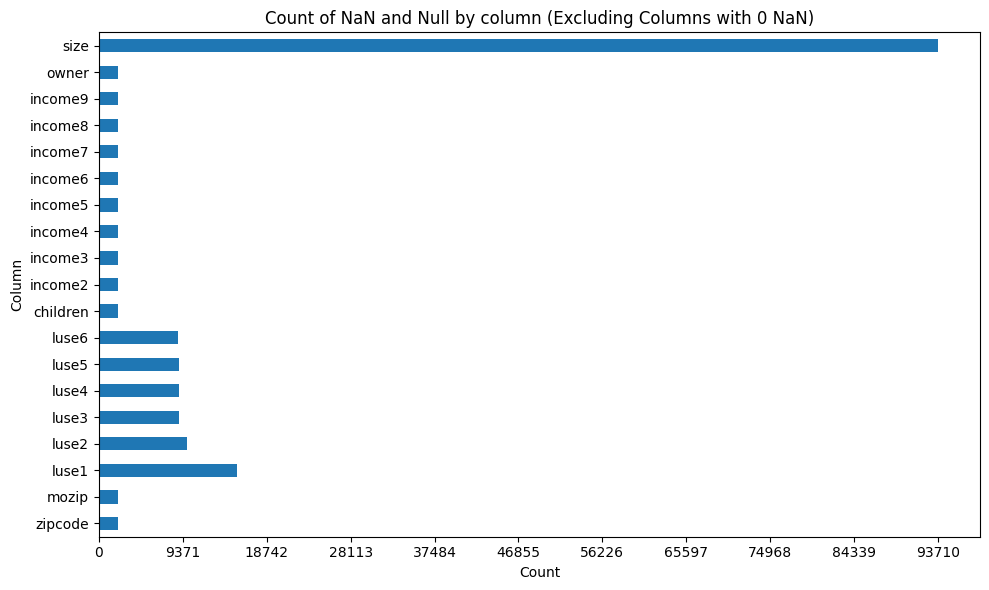

In [ ]:
plt.figure(figsize=(10,6))
df.isnull().sum()[df.isnull().sum() > 0].plot(kind='barh')
plt.title('Count of NaN and Null by column (Excluding Columns with 0 NaN)')
plt.xlabel('Count')
plt.ylabel('Column')
max_value = df.isnull().sum().max()
tick_spacing = max(1, max_value // 10)
plt.xticks(np.arange(0, max_value + tick_spacing, tick_spacing))
plt.tight_layout()
plt.show()

##Total count of NaN and Null in the whole dataset

In [ ]:
print(f"""There are {df.isnull().sum().sum()} NaN/Null values in the dataset.
There are a total of {df.count().sum()} non-NaN/Null values in the dataset.
That means that {(df.isnull().sum().sum() / (df.count().sum() + df.isnull().sum().sum())):.2%} of values are missing.""")

There are 180360 NaN/Null values in the dataset.
There are a total of 8730360 non-NaN/Null values in the dataset.
That means that 2.02% of values are missing.


##Thoughts

After seeing the statistics and the missing values I see that there is around 2% of the data missing from the total amount of values. This 2% can have a significating impact on our data integrity and our work since it is not equally distributed across the dataset, as we can see out of ~180.000 Null values ~93.700 are missing just in the 'size' column.

Depending on where the data is missing and what our goals are, we can evaluate the impact of the missing data on our goals. If a certain column is not important for us we can just leave it like that, delete it or maybe use a SimpleImputer with a preset value to insert in. In our case all of the columns are affected and this affects our work, the most affected ones are the columns size, luse1, luse2, and in my opinion the owner and children ones are very important even though they are not that affected as the first three stated.

Missing data can create biases and if we have biases how sure can we be in our conclusions?
If I want to compute the average size of a house with the data that I have and knowing that there is so much missing data, can I be sure that my calculation is correct?

##Outliers

<Figure size 1000x500 with 0 Axes>

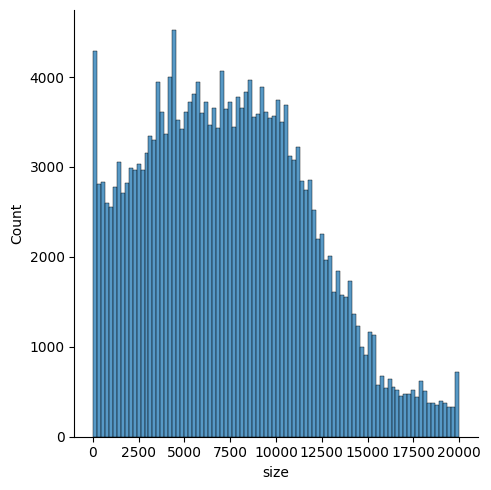

In [ ]:
plt.figure(figsize=(10,5))
sns.displot(df['size'])
plt.show()


In [ ]:
print(f"""We have a skewness of {(skew(dfnona['size'])):.2f}, that means we have more in the left of our distribution.
We have a kurtosis of {(kurtosis(dfnona['size'])):.2f} we have a flat peak and light tails.
A problem that we can see after plotting the distribution is the fact that there are errors in the data, we have a column at size = 0 which is very big.
This is a big problem because we can't have a house that has a sqrft size of 0, to the matter of fact in the USA a house needs to be at least 120 sqrft to even be built or considered a house.
To solve this problem we can either delete the rows which contain the error, or fix the error by puttin in the average size of a house (coming from the size column), or the minimum 120 sqrft""")

We have a skewness of 0.38, that means we have more in the left of our distribution.
We have a kurtosis of -0.43 we have a flat peak and light tails.
A problem that we can see after plotting the distribution is the fact that there are errors in the data, we have a column at size = 0 which is very big.
This is a big problem because we can't have a house that has a sqrft size of 0, to the matter of fact in the USA a house needs to be at least 120 sqrft to even be built or considered a house.
To solve this problem we can either delete the rows which contain the error, or fix the error by puttin in the average size of a house (coming from the size column), or the minimum 120 sqrft


<Axes: >

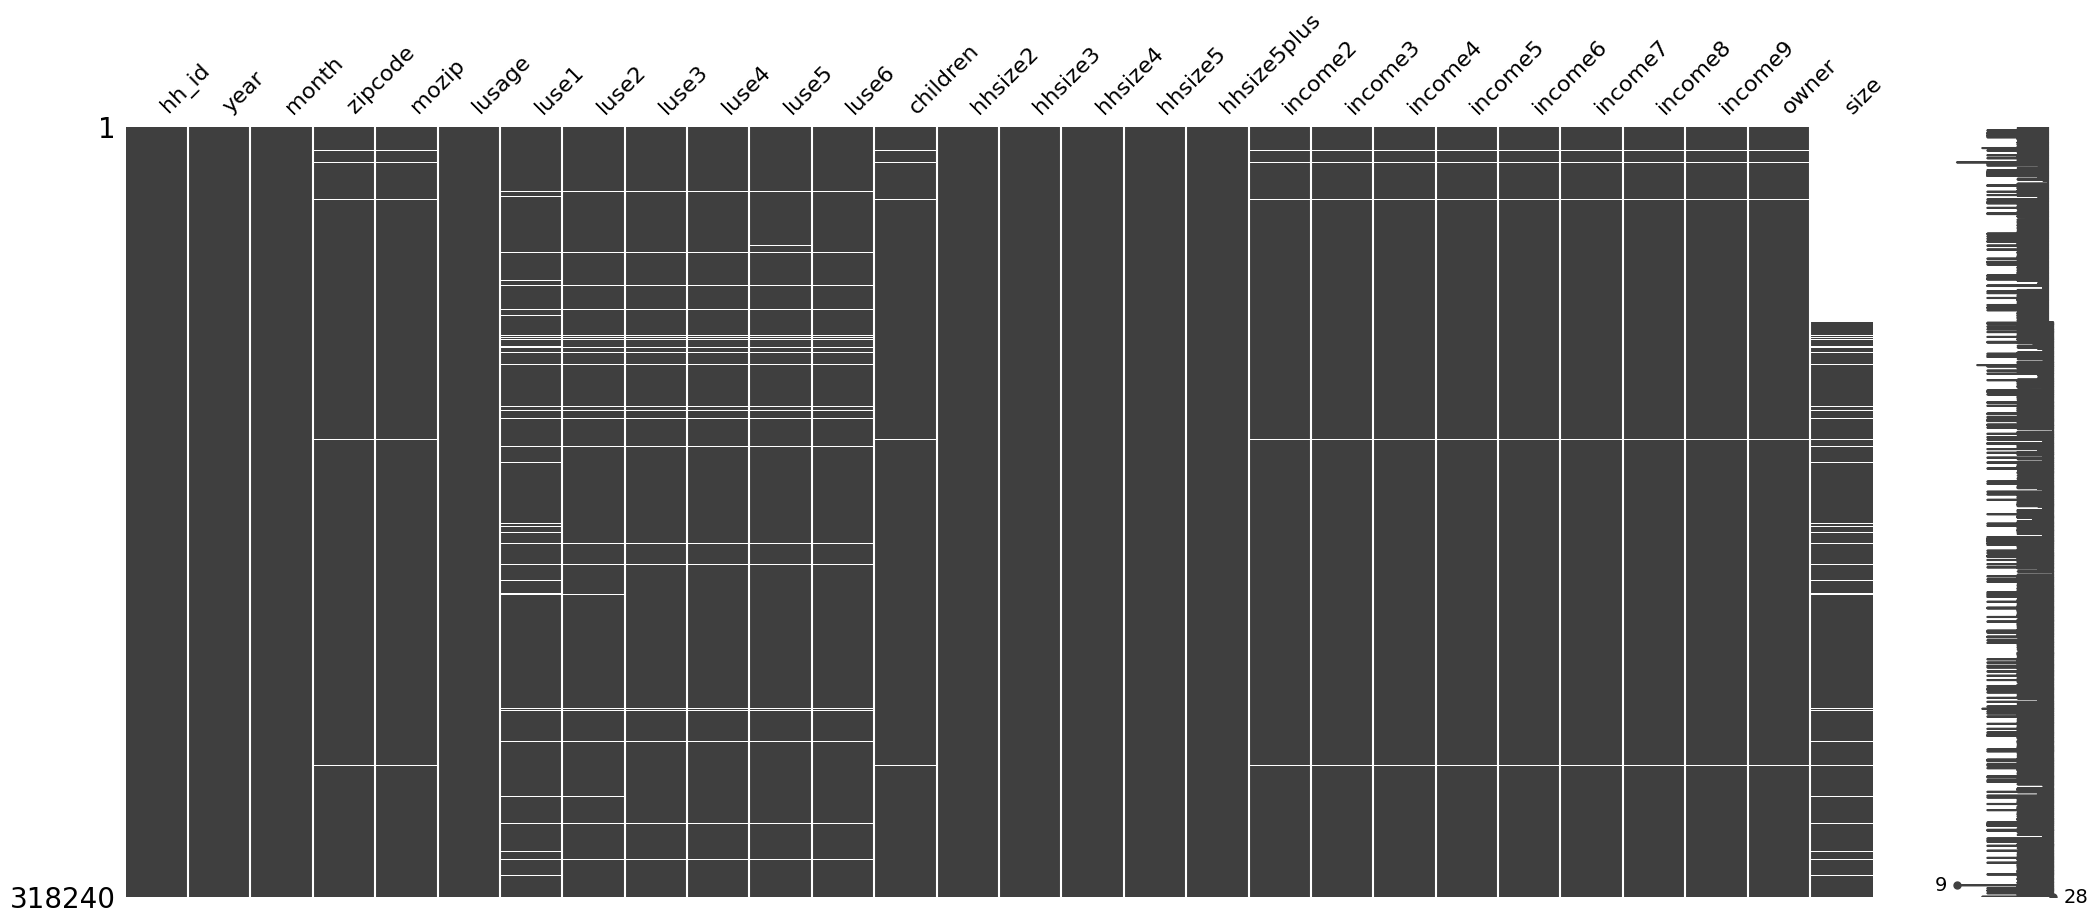

In [ ]:
msno.matrix(df)

We can see that data is missing first of all in the size column, but it is not correlated with any other column in terms of missing data. But what we see is the fact that the first part of the size column has missing data, which we could conclude that we do not have data for the first part of houses.

The other part where data is missing is in luse1-6 where we can see that for some houses it is corellated to not have the data in those columns. This could be due to the fact that they didn't have the billing records or several other factors.

#Imputation

So with the size column we have two problems, the missing data which we saw missing at random and the fact that it has outliers.

I decided to go with MICE for imputation since it also works with missing data, it works with mixed types of variables and I didn't want to go with SimpleImputation since I didn't want to create biases from my own thoughts.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

dfcopy = df.copy(deep=True)
mice = IterativeImputer()
dfcopy['size'] = mice.fit_transform(dfcopy[['size']])

In [ ]:
dfcopy['size'].isna().sum()

0

<Figure size 1000x500 with 0 Axes>

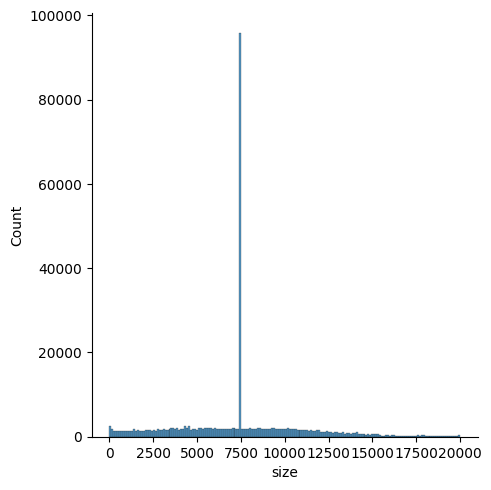

In [ ]:
plt.figure(figsize=(10,5))
sns.displot(dfcopy['size'])
plt.show()

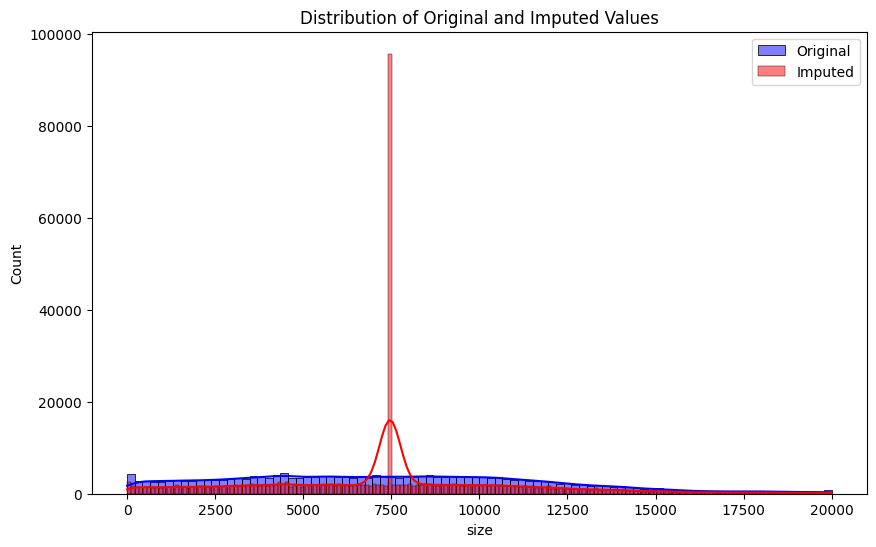

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['size'], color='blue', label='Original' , kde=True)
sns.histplot(dfcopy['size'], color='red', label='Imputed', kde=True)
plt.legend()
plt.title("Distribution of Original and Imputed Values")
plt.show()

In [ ]:
z_scores = np.abs(stats.zscore(dfcopy['size']))
outliers = dfcopy[z_scores > 3]
print("Outliers based on z-scores:")
print(outliers)

Outliers based on z-scores:
        hh_id  year  month  zipcode  mozip    lusage     luse1     luse2  \
84620   12573  2010      4     42.0  425.0  6.057319  6.183057  5.732995   
84621   12573  2010      5     42.0  426.0  5.817795  6.183057  5.732995   
84622   12573  2010      6     42.0  427.0  5.551181  6.183057  5.732995   
84623   12573  2010      7     42.0  428.0  5.565127  6.183057  5.732995   
84624   12573  2010      8     42.0  429.0  5.558147  6.183057  5.732995   
...       ...   ...    ...      ...    ...       ...       ...       ...   
316655  47129  2011      4      1.0   11.0  5.797088  6.150213  6.344466   
316656  47129  2011      5      1.0   12.0  5.721072  6.150213  6.344466   
316657  47129  2011      6      1.0   13.0  5.767031  6.150213  6.344466   
316658  47129  2011      7      1.0   14.0  6.575303  6.150213  6.344466   
316659  47129  2011      8      1.0   15.0  5.802835  6.150213  6.344466   

           luse3     luse4  ...  income2  income3  income4 

In [ ]:
dfcopy['is_outlier'] = z_scores > 3
print(dfcopy[['size', 'is_outlier']][dfcopy['is_outlier'] == True])

           size  is_outlier
84620   19631.0        True
84621   19631.0        True
84622   19631.0        True
84623   19631.0        True
84624   19631.0        True
...         ...         ...
316655  19051.0        True
316656  19051.0        True
316657  19051.0        True
316658  19051.0        True
316659  19051.0        True

[2510 rows x 2 columns]


According to the z-score we have 2510 outliers.

What we also see is the fact that when comparing the two distributions, we see that the inputted data is mostly added in one place near the 7500 size mark.

Let's now take a look at some distributions and ranges for the data without outliers and errors in the data.

In [ ]:
dfcopy['size'][(dfcopy['size'] >= 120) & (dfcopy['is_outlier'] == False)].describe()

,size
count,313010.000000
mean,7430.342405
std,3548.925196
min,121.000000
25%,5375.000000
50%,7461.814813
75%,9069.000000
max,18677.000000


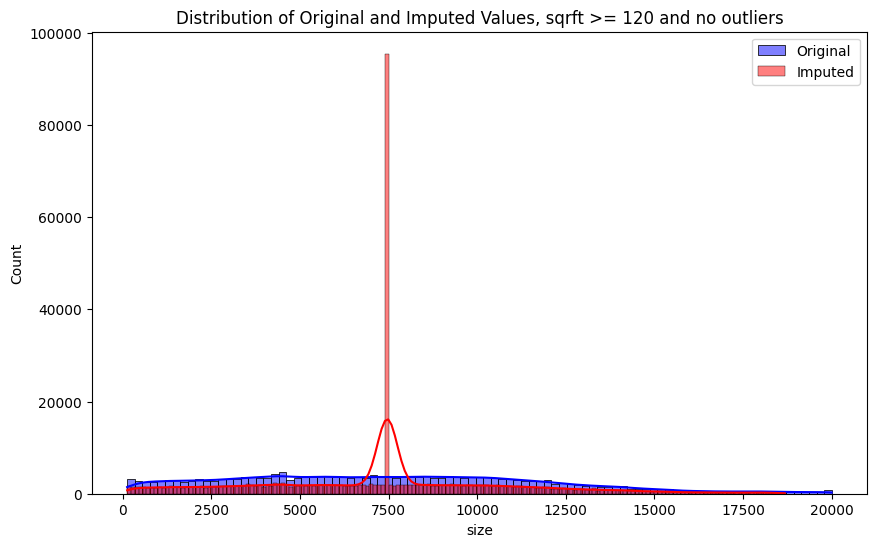

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['size'][df['size'] >= 120], color='blue', label='Original' , kde=True)
sns.histplot(dfcopy['size'][(dfcopy['size'] >= 120) & (dfcopy['is_outlier'] == False)], color='red', label='Imputed', kde=True)
plt.legend()
plt.title("Distribution of Original and Imputed Values, sqrft >= 120 and no outliers")
plt.show()

In [ ]:
kurtosis(dfcopy['size'][(dfcopy['size'] >= 120) & (dfcopy['is_outlier'] == False)]), skew(dfcopy['size'][(dfcopy['size'] >= 120) & (dfcopy['is_outlier'] == False)])

(0.379851997568057, 0.3365847400434997)

##Thoughts

After imputing with MICE and removing the errors of anything under 120 sqrft, we can see that the new data has changed a bit, we now have a mean of size of 7430 sqrft, while before we had 7461 sqrft. The data that was added hasn't created biases.

Kutosis is now at 0.37 while we had -0.43 before, this means that now our data distribution is relatively normal, which is good.
Skewness is at 0.33, while it was at 0.38 before, now it means the same as before, there is slight assimetry in the data




#Average consumption for average house size

This question I think is important because in Romania this is how the government decides the prices on electricity.

In [ ]:
filtered_df = dfcopy[(dfcopy['size'] >= dfcopy['size'].mean() - dfcopy['size'].std()) & (dfcopy['size'] <= dfcopy['size'].mean() + dfcopy['size'].std())]
average_consumption = filtered_df['lusage'].mean()
print(f"Average electricity consumption for houses within one standard deviation of the mean size is {(average_consumption):.2f} kwh per month.")


Average electricity consumption for houses within one standard deviation of the mean size is 6.37 kwh per month.


#Final Thoughts

The dataset is full of information that can be subtracted, considering the fact that it had 2% missing values. There are a lot of other questions that can be answered from this dataset not only the ones that I have answered.
